### Neural Networks from Scratch - P.1 Intro and Neuron Code

 A simple neural network with 3 inputs.
having 3 inputs basically means it should have 3 weights 
it was given a bias of 2 because each neuron has its unique connection to the previous neuron

to get the output it was calculated by summing up the dot products of the inputs and weights, and the bias.

this means the neuron has two outputs, one for the dot products and the other for the bias value


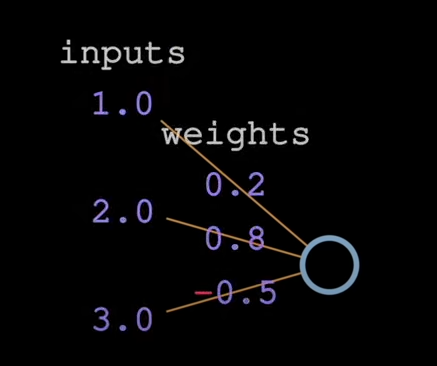 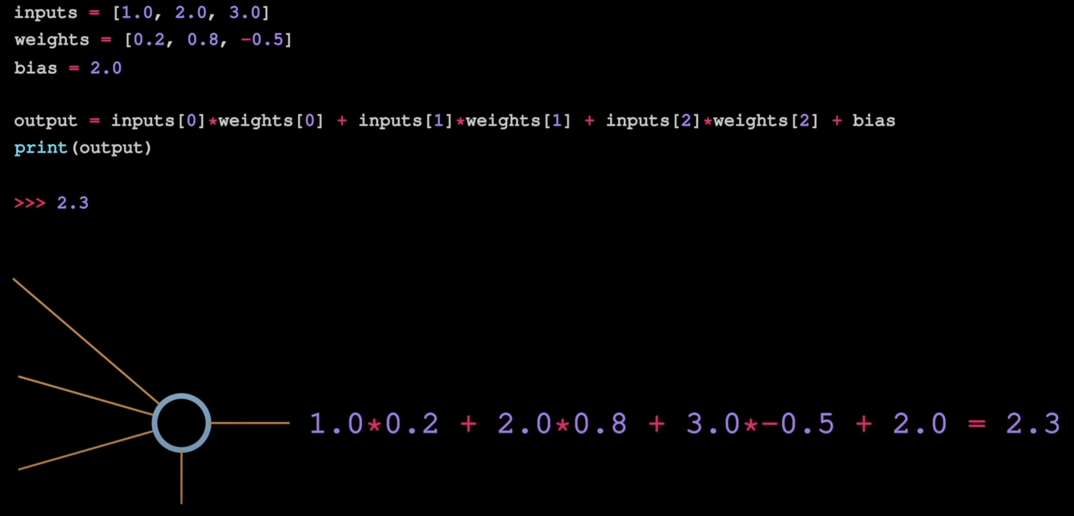

In [1]:
inputs=  [1,2,3] 
weights=[0.2,0.8,-0.5]
bias = 2


outputs=inputs[0]*weights[0] +  inputs[1]*weights[1] + inputs[2]*weights[2] + bias      

print(outputs)

2.3


### Neural Networks from Scratch - P.2 Coding a Layer 
 
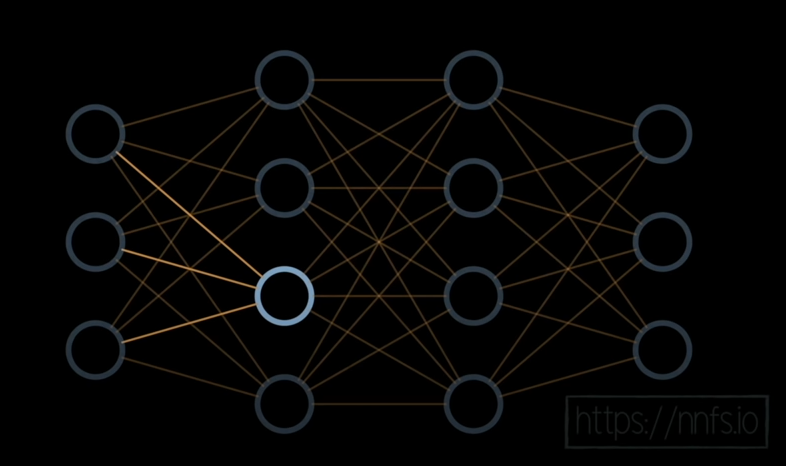

the code below shows the network between this neuron

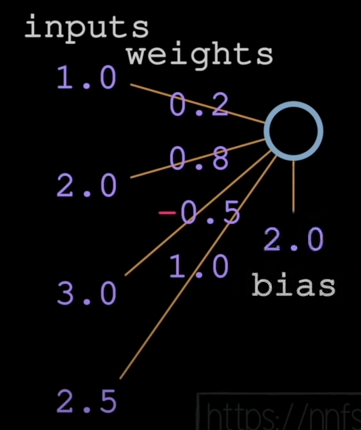

we're building a layer of neurons
so we have 3 unique weights to represendt each neuron which takes 4 inputs hence the sets of 4 values in each weight
we'll also need 3 unique "bias" for each neuron
NB: the input could be from actual sensor values, other neurons or they could be actual inputs

we have a layer of 3  neurons. each neuron takes 4 inputs and gives 3 distinct outputs since we have 3 weights representing each neuron.

In [2]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5


outputs=[inputs[0]*weights1[0] +  inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] +bias1, 
         inputs[0]*weights2[0] +  inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] +bias2,
          inputs[0]*weights3[0] +  inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] +bias3 ]     

print(outputs)

[4.8, 1.21, 2.385]


### Neural Networks from Scratch - P.3 The Dot Product

a tensor is basically any object that can be converted to an array


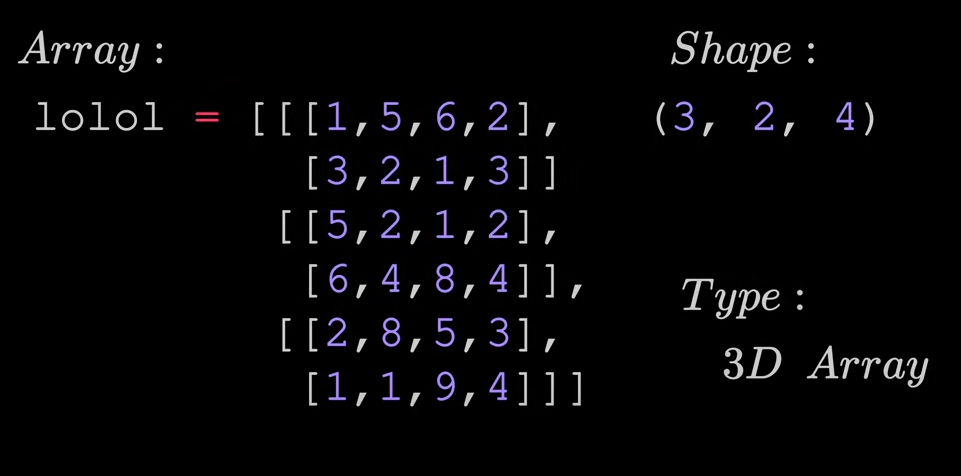  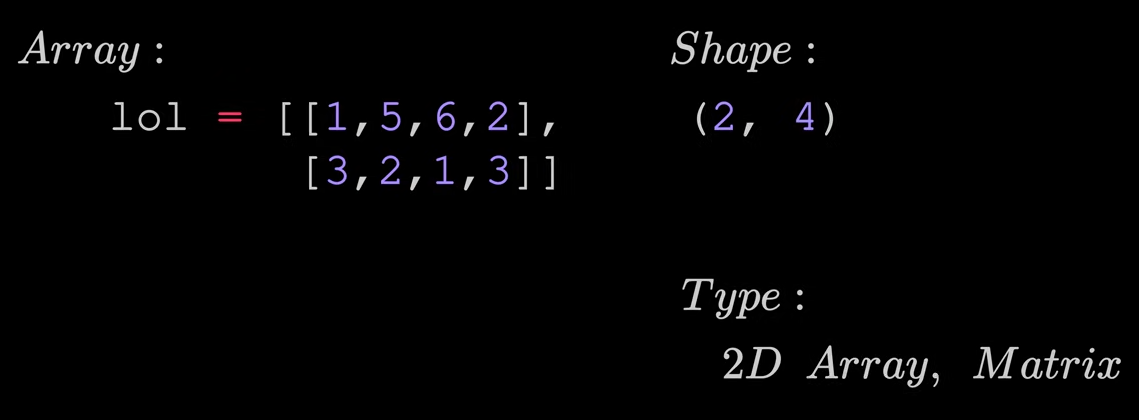  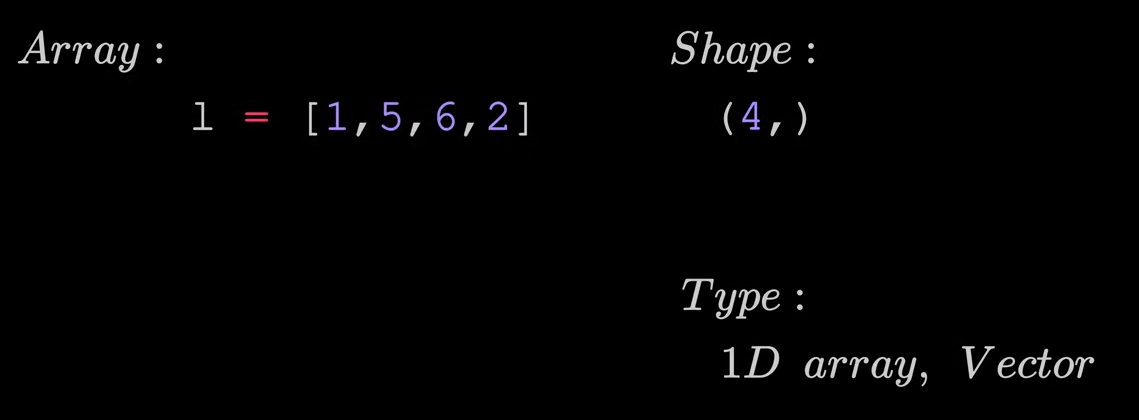  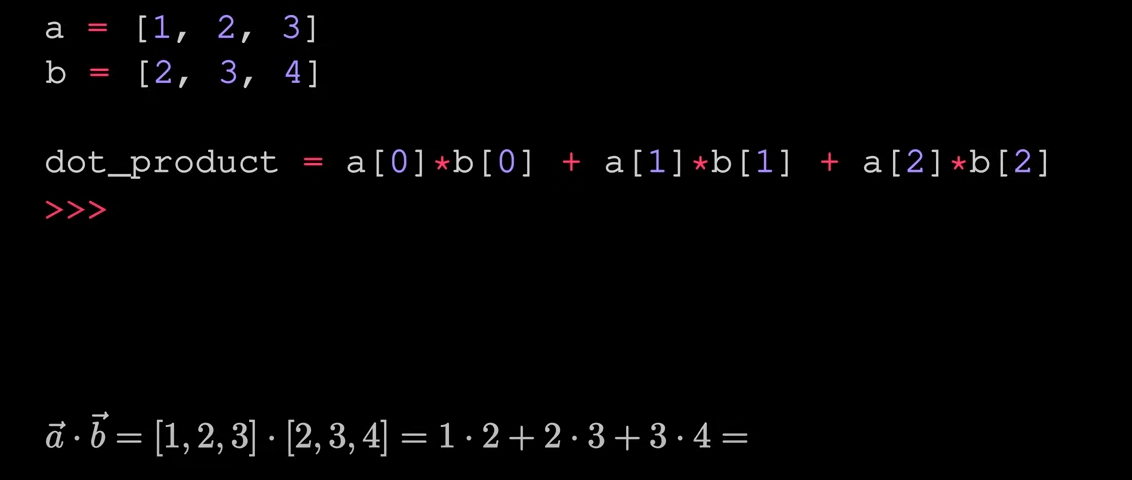



numpy basically helps us to perform calculations in array form makij=ng things simpler.

In [3]:
import numpy as np

inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot(inputs,weights) + bias
print(output)

4.8


### np.dot(weights,inputs) not np.dot(inputs,weights)

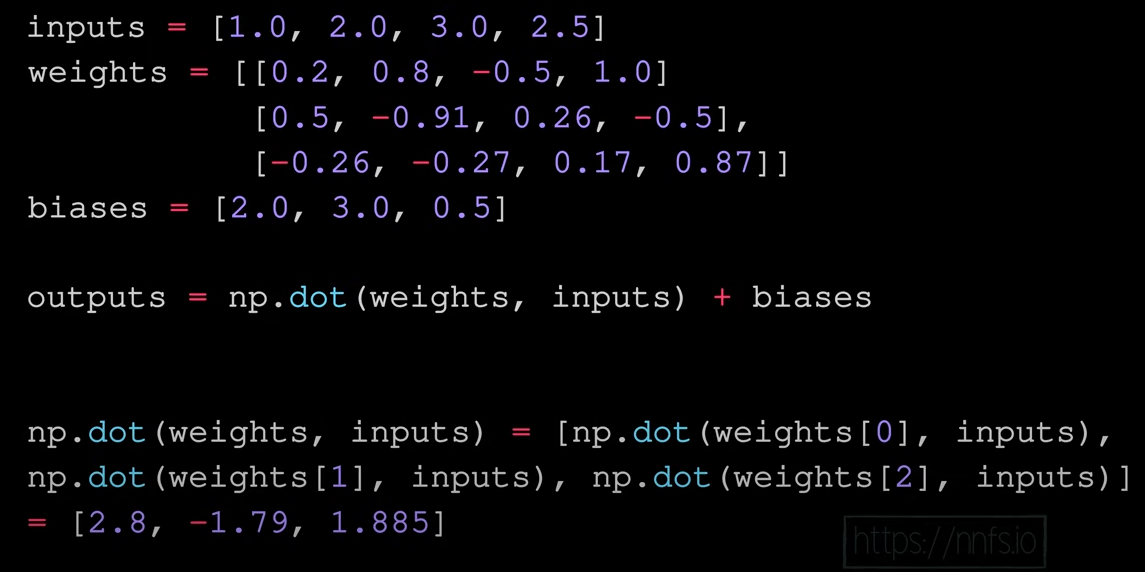

In [4]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

output = np.dot(weights,inputs) + biases
print(output)

[4.8   1.21  2.385]


### Neural Networks from Scratch - P.4 Batches, Layers, and Objects

we're going to take single inputs and convert them into a batch of inputs
the purpose of creating these batches is to be able to run calculations in parallel
this is why we prefer to use gpu instead of cpus because gpus have 100s of cores while the average cpu has about 4-16 cores..limiting parallel calculations

the smaller the batch size, the more difficult it is for your model to fit the input data
whereas passing all your data at once will make your model overfit your sample data; this is bad for generalization because your model will do well with your smaple data but will perform badly on a general sample.
a batch size of 32 is very common but you can have 64 and in rare cases 128

in this case np.dot(weights,inputs) because the input shape has changed and it's the same as the weights..
to solve this, transpose the weights and find the dot product with the inputs "np.array(weights).T"

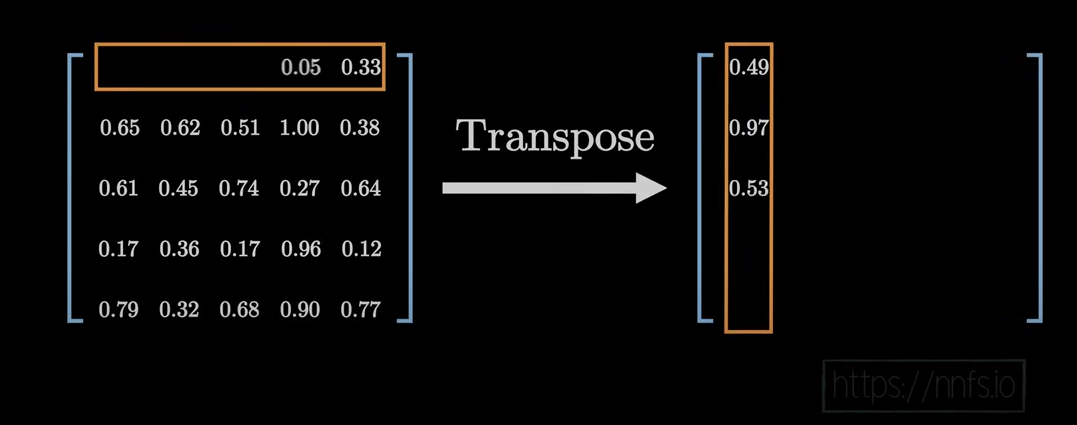  


the calculation 


 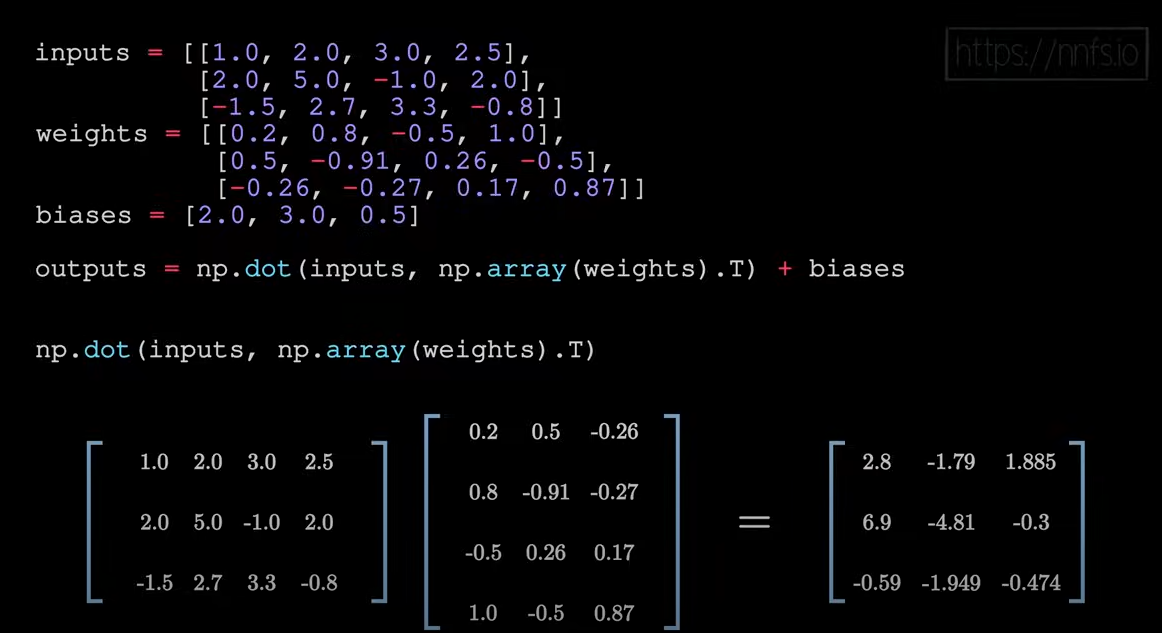
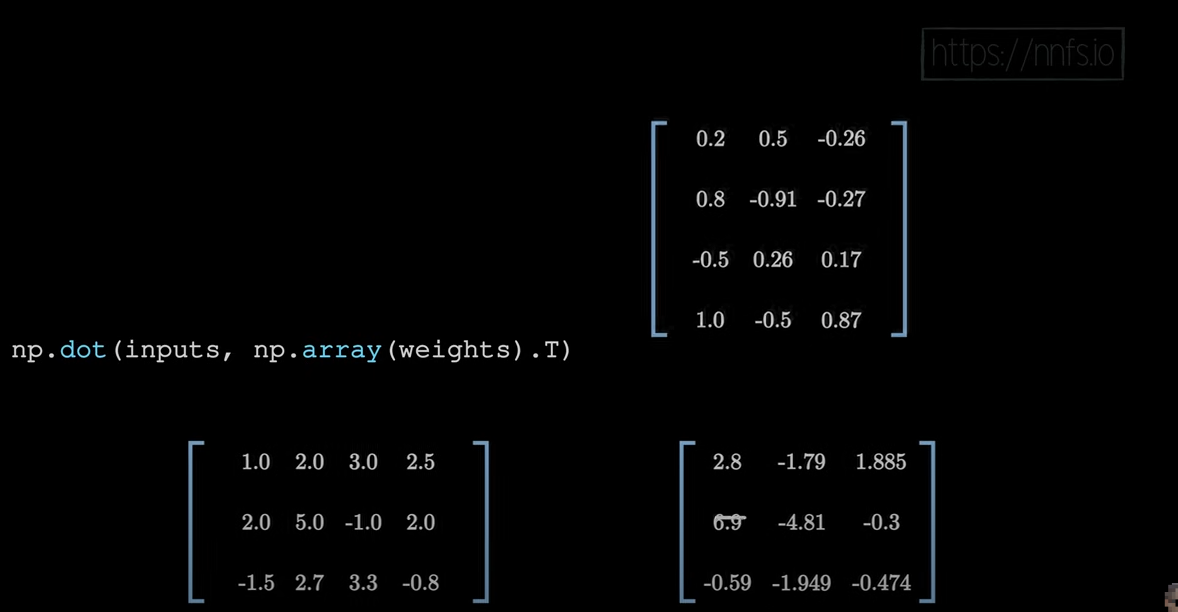

In [5]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

output = np.dot(inputs,np.array(weights).T) + biases
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


#### adding another layer to the already existing neural network

In [6]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights1 = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]


biases1 = [2,3,0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, -0.73, -0.13]]


biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs,np.array(weights1).T) + biases1
layer2_output = np.dot(layer1_output,np.array(weights2).T) + biases2
output = layer2_output
print(output)

[[ 0.5031  -1.04185 -3.80535]
 [ 0.2434  -2.7332  -3.1207 ]
 [-0.99314  1.41254 -1.89101]]


### objects
#### converting the layers above to object form
define the hidden layers(two of them)
they're called hidden layers beacuse we don't specify how the layers change, it's based on the library..we just define two layers.

smaller values are preferred in deep learning.. ranges of -1 to +1
so you most likely need to initialize your weights from -0.01 to +0.01
and initialize your bias with 0. but in some cases when you find the dot product of your weights and inputs you tend to get almost zero values due to how small your outputs are.
you end up having dead neural networks,
To resolve this it's best to use a non-zero bias value to offset the output.

as you can see the, the some vectors of the weights generated are too big (1.764...), (1.86755...)
to resolve this and get our weights to the ideal range that is -1 to +1 we scaled it down by multiplying it by 0.10 resulting in a more ideal value.
sometimes you'll need to scale your inputs to obtain these ideal values 

In [7]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self):
        pass

print(np.random.randn(4,3))
print("  ")
print(0.10*np.random.randn(4,3))

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]]
  
[[ 0.07610377  0.0121675   0.04438632]
 [ 0.03336743  0.14940791 -0.02051583]
 [ 0.03130677 -0.08540957 -0.25529898]
 [ 0.06536186  0.08644362 -0.0742165 ]]


layer1 = Layer_Dense(4,5)

layer1 = Layer_Dense(size of input,number of neurons)

size of input is determeined from your sample input data..in our case we have 4
X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]] since we have 4 sets of numbers in each set of data[1, 2, 3, 2.5].
the number of neurons can be any number of your choice..in our case we chose 5.

the calculated output is passed from layer1 to layer to sequentially so the output of layer1 =(..., 5) determeines the input of layer2 hence layer2=(5,...)

In [8]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

print(" ")

layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
 
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


### Neural Networks from Scratch - P.5 Hidden Layer Activation Functions
Activation function basically takes your layer outputs as its inputs. 
the results np.dot(inputs,neurons)+bias is passed through your activation function as an input.

there are varieties of activation functions and that includes step functions(unit step function),sigmoid,ReLu

if your input to the step function is greater than zero then your output will be a one, otherwise your output is zero; this is how step  functions work..very simple

sigmoid activation fn: it's a little more easy/reliable to train a neural network. It gives a more granular output which helps us to determine how close we were to zero.

ReLU fn: if x is greater than zero your output is x. if x is less than or equal to zero your output is zero.sigmoid fn has its own limitations such as the vanishing gradient point.
ReLU is superior in this instance. ReLU is faster and just simply works.
ReLU is the most popular value of all. Rectified Linear Function

NB: we use the optimizer to decrease loss by optimizing the weights and bias values

In [9]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]


#ReLU activation function algo

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    if i > 0:
        output.append(i)
    elif i <= 0:
        output.append(0)

print(output)

'''
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

print(" ")

layer2.forward(layer1.output)
print(layer2.output)
'''

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


'\nclass Layer_Dense:\n    def __init__(self, n_inputs, n_neurons):\n        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)\n        self.biases = np.zeros((1,n_neurons))\n    def forward(self, inputs):\n        self.output = np.dot(inputs, self.weights) + self.biases\n\nlayer1 = Layer_Dense(4,5)\nlayer2 = Layer_Dense(5,2)\n\nlayer1.forward(X)\nprint(layer1.output)\n\nprint(" ")\n\nlayer2.forward(layer1.output)\nprint(layer2.output)\n'

In [10]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]


#ReLU activation function algo

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(max(0,i)) #simpler way to implement this

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


2 hidden layers with a ReLu activation function in forward propagation only..

In [11]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]


#ReLU activation function algo


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

print(" ")

layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
 
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


### importing nnfs library to help generate the code from any part of the video


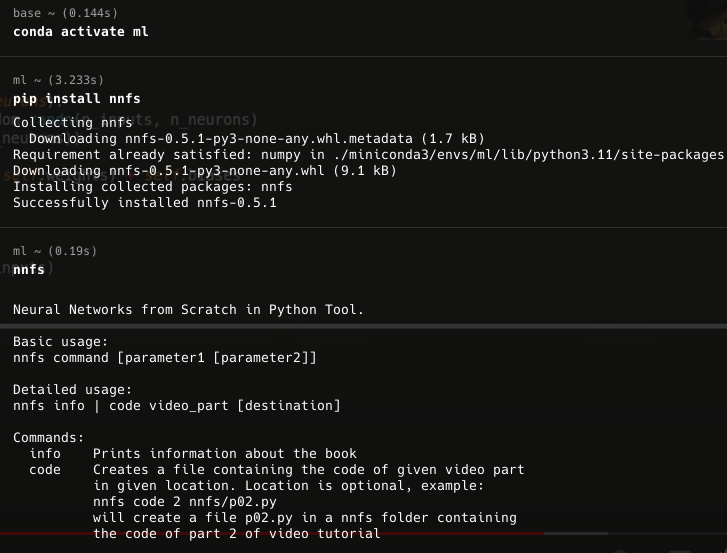

### generating dataset for inputs
#https://cs231n.github.io/neural-networks-case-study/

points refers to the number of features/inputs of a specific input.
in our syntax below we see x,y meaning each data point has two features i.e the x and y coordinates

classes refers to each distinct set of datapoints.

spiral_data(100,3) means we have 3 different data points and we have a total of 100(feature sets) data points. 
note that each point has 2 inputs (x,y)

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [12]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

print(" ")

layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
 
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [13]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()


X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]



X, y = spiral_data(100, 3)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


#ReLU activation function algo
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()
#layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

print(" ")
print("layer1 outputs after passing through activation fn ReLU")
print(" ")
activation1.forward(layer1.output)
print(activation1.output) #ReLU fn: if x is greater than zero your output is x. if x is less than or equal to zero your output is zero.

#layer2.forward(layer1.output)
#print(layer2.output)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]
 
layer1 outputs after passing through activation fn ReLU
 
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.

### Neural Networks from Scratch - P.6 Softmax Activation

the first step in training a model is to determine how wrong the model is. Accuracy is the key determiner 

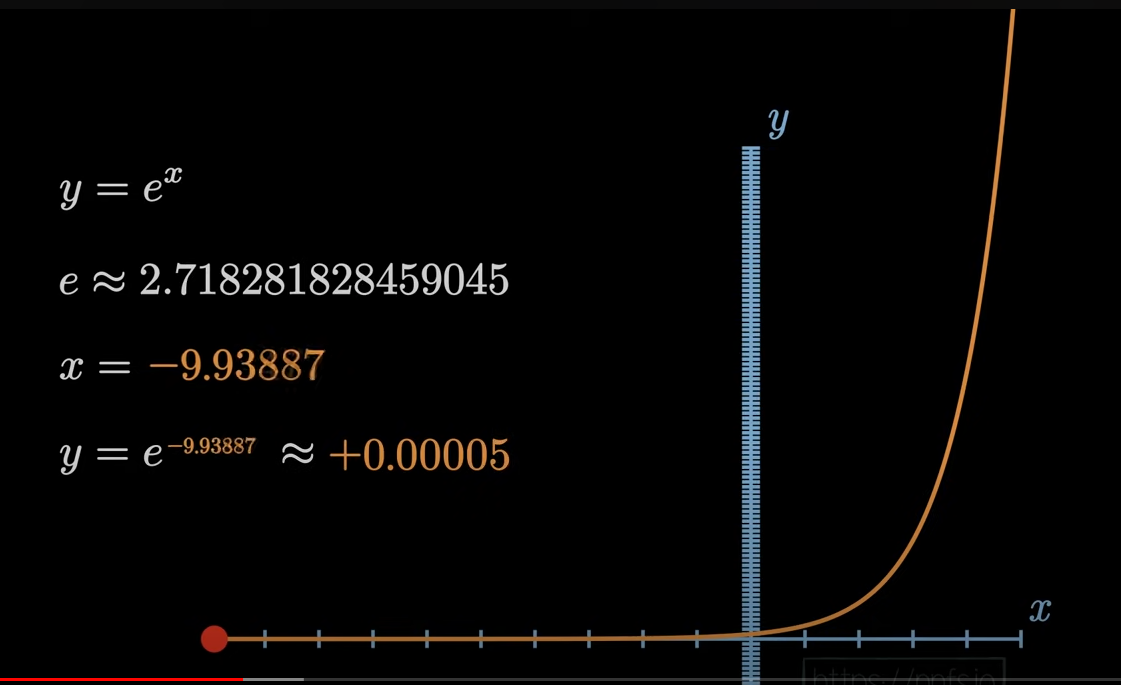


### coding the raw python implementation of exponentiaition

In [14]:
import math

layer_outputs = [4.8, 1.21, 2.385]
#E = 2,71828182846

E = math.e

exp_values = []

for output in layer_outputs:
    exp_values.append(E**output)

print(exp_values)    

#we need to normalize these values
#a single output neuron value divided by the sum of all of the other ouput neurons in the output layer
#we exponentiate to get rid of all the negative values without losing the meaning of the negative value

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value/norm_base) #we normalize these values to be able to feed these values through our neurons, remember when we said we base our values between +1 and -1 with values like 0.1, 0.01

print(" ")
print(norm_values)
print(" ")
print(sum(norm_values))#this sum shouldnt be 1..although close to 1

[121.51041751873483, 3.353484652549023, 10.859062664920513]
 
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
 
0.9999999999999999


### implementing softmax activation in numpy

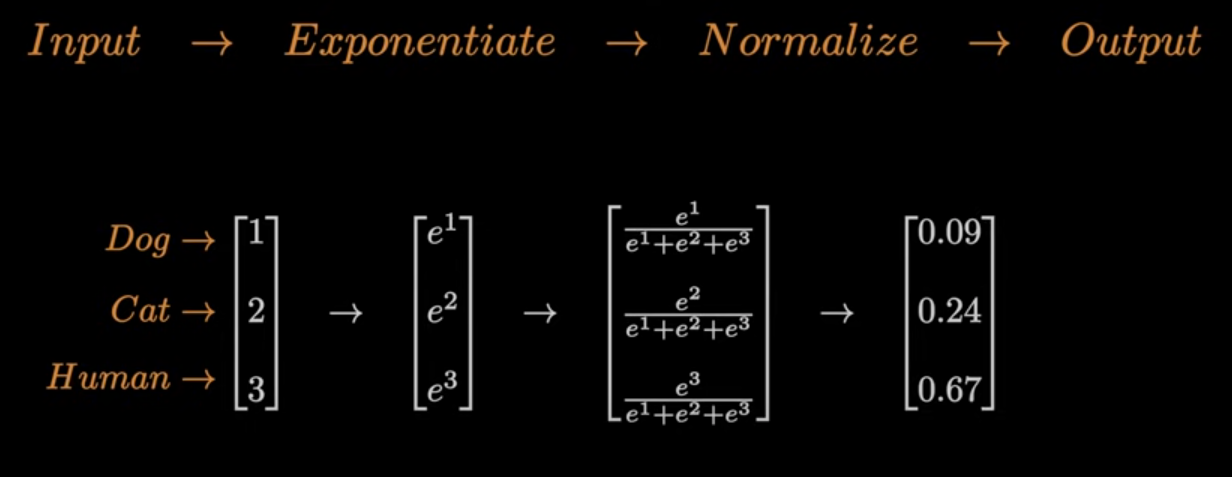


a combination of exponentiation + normalization = softmax

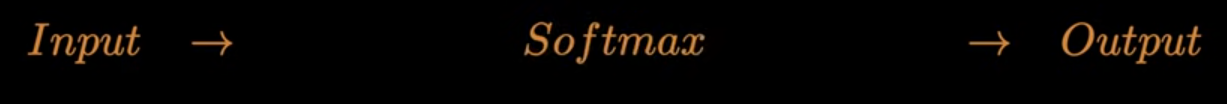

In [15]:
import math
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]
#E = 2,71828182846

E = math.e

exp_values = np.exp(layer_outputs)


print(exp_values)    

#we need to normalize these values
#a single output neuron value divided by the sum of all of the other ouput neurons in the output layer
#we exponentiate to get rid of all the negative values without losing the meaning of the negative value

#norm_base = sum(exp_values)
norm_values = exp_values/ np.sum(exp_values)
#we normalize these values to be able to feed these values through our neurons, remember when we said we base our values between +1 and -1 with values like 0.1, 0.01


print(" ")
print(norm_values)
print(" ")
print(sum(norm_values))#this sum shouldnt be 1..although close to 1

[121.51041752   3.35348465  10.85906266]
 
[0.89528266 0.02470831 0.08000903]
 
0.9999999999999999


### normalizing vectors; softmax activation of vectors

In [16]:
import math
import numpy as np
import nnfs

nnfs.init()

layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

print(np.sum(layer_outputs ) ) #by default axis=None here
print(" ")
print(np.sum(layer_outputs, axis=0)) #sums the columns of the matrix
print(" ")
print(np.sum(layer_outputs, axis=1)) #sums the rows of the matrix #this is what we want but we need to shape it.
print(" ")

#we can shape it by adding another parameter keepdims=True
print(np.sum(layer_outputs, axis=1, keepdims=True)) #sums the rows of the matrix and 
print(" ")

exp_values = np.exp(layer_outputs)

print(exp_values)
print(" ")
#norm_values = exp_values/ np.sum(exp_values)

norm_values = exp_values/np.sum(exp_values, axis=1, keepdims=True) # this normalizes the values giving us the softmax activation

print(norm_values)



18.172
 
[15.11   0.451  2.611]
 
[8.395 7.29  2.487]
 
[[8.395]
 [7.29 ]
 [2.487]]
 
[[1.21510418e+02 3.35348465e+00 1.08590627e+01]
 [7.33197354e+03 1.63654137e-01 1.22140276e+00]
 [4.09595540e+00 2.86051020e+00 1.02634095e+00]]
 
[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


### overflow prevention
it doesn't take too long to get an overflow  as the values increase. how do we fix this?

#### overflow

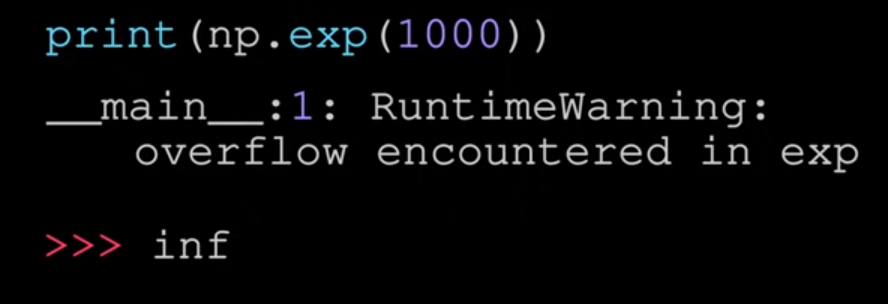

one way to prevent this is by subtracting the highest value of all the output values prior to exponentiating.
this makes the biggest number zero and the smaller numbers relatively smaller if not negative

example indicated below

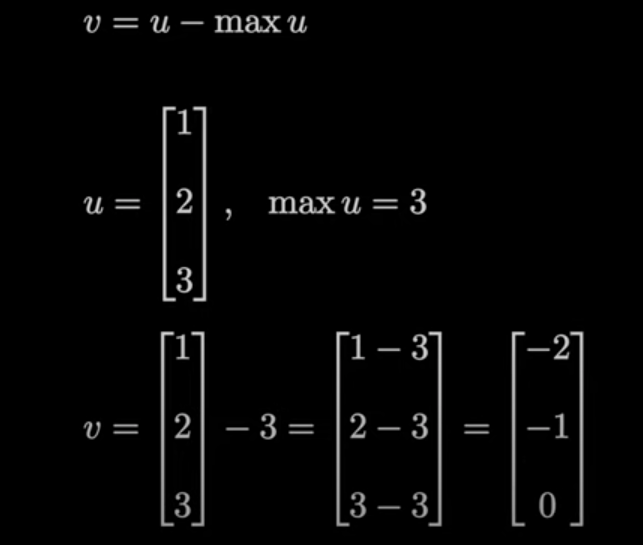

our range of inputs then become (-infiniy,0) and our output after exponentiation becomes (0,1) 
indicated below

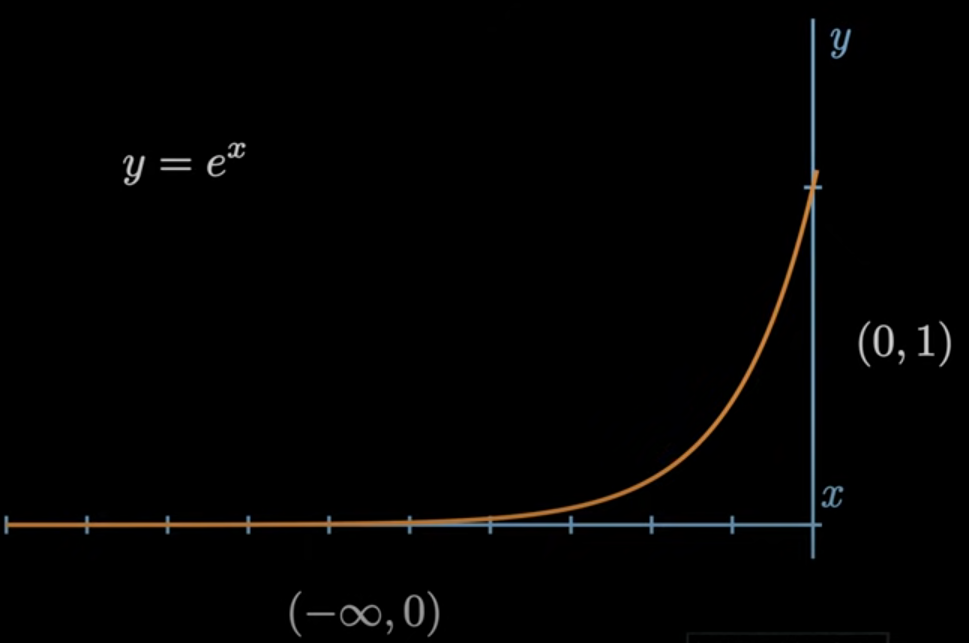

### integrating our softmax activation class into our model

In [17]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()



class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =  0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


#ReLU activation function algo
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

#softmax activation function
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities



X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5]) #this gives you the first 5 outputs
print(" ")
print(activation2.output)


'''
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()
#layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

print(" ")
print("layer1 outputs after passing through activation fn ReLU")
print(" ")
activation1.forward(layer1.output)
print(activation1.output) #ReLU fn: if x is greater than zero your output is x. if x is less than or equal to zero your output is zero.

#layer2.forward(layer1.output)
#print(layer2.output)
'''

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]
 
[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]
 [0.33328417 0.33328718 0.33342862]
 [0.33318216 0.33319145 0.33362636]
 [0.33318278 0.33319202 0.33362517]
 [0.33314922 0.33316055 0.3336902 ]
 [0.3331059  0.33311984 0.3337743 ]
 [0.3330813  0.3330968  0.33382186]
 [0.33311027 0.33312503 0.33376473]
 [0.3330537  0.33307084 0.33387548]
 [0.33300948 0.33302936 0.3339612 ]
 [0.33301342 0.33303303 0.33395353]
 [0.33299845 0.333019   0.3339825 ]
 [0.33312678 0.33318865 0.3336846 ]
 [0.3329409  0.33296496 0.33409408]
 [0.33299428 0.33303145 0.33397427]
 [0.3328737  0.33290187 0.33422446]
 [0.3328757  0.33290377 0.33422053]
 [0.33309552 0.33318356 0.33372095]
 [0.33317605 0.33328283 0

'\nlayer1 = Layer_Dense(2,5)\nactivation1 = Activation_ReLU()\n#layer2 = Layer_Dense(5,2)\n\nlayer1.forward(X)\nprint(layer1.output)\n\nprint(" ")\nprint("layer1 outputs after passing through activation fn ReLU")\nprint(" ")\nactivation1.forward(layer1.output)\nprint(activation1.output) #ReLU fn: if x is greater than zero your output is x. if x is less than or equal to zero your output is zero.\n\n#layer2.forward(layer1.output)\n#print(layer2.output)\n'